In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [ ]:
# Create the map
m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
            urcrnrlon=-101.0,urcrnrlat=42.0,\
            projection='merc',resolution='h')
m.bluemarble()
m.drawcoastlines(linewidth=0.5)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawrivers(linewidth=1, linestyle='solid', color='b')

#Draw parallels and meridians
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)

#read in the data
df_metadata = pd.read_csv('metadata.csv')
lats = np.array(df_metadata.Latitude)
lons = np.array(df_metadata.Longitude)

df_precip = pd.read_csv('COPrecip.csv')

x,y = m(lons, lats)

data = df_precip.iloc[[30000]].replace("NaN", 0).values[0]
data = np.delete(data, 0)

# print len(data)
# print len(lons)
# print len(lats)

sizes = 10*data + 10

sc = plt.scatter(x, y, c=data, s=sizes)

In [2]:
df_precip = pd.read_csv('COPrecip.csv')
df_dateinfo = pd.read_csv('DateInfo.csv')
df = pd.concat([df_dateinfo, df_precip], axis = 1)

In [3]:
df = df.drop('Unnamed: 0', 1)

In [4]:
df = df.fillna(0)

In [5]:
df['yr'] = df['yr'].astype(int)
df['mo'] = df['mo'].astype(int)
df['da'] = df['da'].astype(int)

In [6]:
df['date'] = pd.to_datetime(df.yr*10000 + df.mo*100 + df.da, format='%Y%m%d')

In [7]:
df = df.set_index(pd.DatetimeIndex(df['date']))

In [8]:
df = df.drop('date', 1)
df = df.drop('mo', 1)
df = df.drop('da', 1)
df = df.drop('yr', 1)
df     #This is our 'base' df. It is indexed by timestamp (YYYY-MM-DD), and gives the precipitation in any of 197 different
       #locations, in units of 0.1mm.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197
1900-01-01,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-02,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-03,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-04,0,0,0,0,0,0,1.3,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-05,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-06,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-07,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-08,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-09,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0
1900-01-10,0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0,0.0


In [54]:
###############################
# CALCULATIONS  
###############################

#df.groupby([lambda x: x.month]).mean()
#df = df.groupby([lambda x: x.year, lambda x: x.month]).mean()

df_yearlysum = df.groupby([lambda x: x.year]).sum()   #annual precipitation in each location
df_yearlysum_statewide = df_yearlysum.sum(axis = 1)   #annual precipitation, statewide. ie. "over the last century, which has been the rainiest year?"
#df_yearlysum_statewide

df_monthlysum = df.groupby([lambda x: x.month]).sum()   #monthly precipitation in each location
df_monthlysum_statewide = df_monthlysum.sum(axis = 1)   #monthly precipitation, statewide. ie. "over the last century, which has been the rainiest month?"
#df_monthlysum_statewide

df_dailysum = df.groupby([lambda x: x.day]).sum()   #daily precipitation in each location
df_dailysum_statewide = df_dailysum.sum(axis = 1)   #daily precipitation, statewide. ie. "over the last century, which has been the rainiest day?"
#df_dailysum_statewide

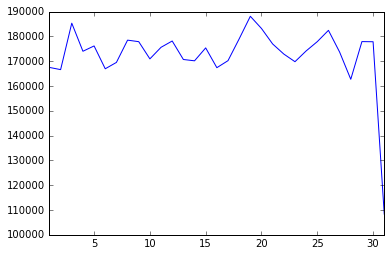

In [55]:
#ax = df_yearlysum_statewide.plot()
#ax = df_monthlysum_statewide.plot()
ax = df_dailysum_statewide.plot()

##Google says CO has an average annual precipitation of 38cm = 3800 tenths of mm

# ax.set_xlabel("time")
# ax.set_ylabel("precipiation")